In [1]:
import pandas as pd

import pandas as pd # use dataframes, for data analysis 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import KNNBasic,KNNWithMeans,accuracy
from surprise.model_selection import train_test_split

In [ ]:
#archive has 5 files:
# - anime.csv : list animes with characteristics. Interesting columns : genres, studio, type, rating (age), episodes, source
# - anime_with_synopsis.csv : same as above
# - animelist.csv : users with user_id, anime_id, rating, watching_status, watched_episodes
# - rating_complete.csv : part of animelist with only completed and rated animes 
# - watching_status.csv : all possible status for watching_status in animelist

In [19]:
# df_ = pd.read_csv('./data/anime.csv')

In [10]:
# df = pd.read_csv('./data/animelist.csv', usecols=range(3), header=0, names=('user', 'item', 'rating'))
# df = df.query('rating!=0') #filter rows with 0 as rating: user has added the anime to his list but not rated it yet

In [2]:
df = pd.read_csv('./data/rating_complete.csv', usecols=range(3), header=0, names=('user', 'item', 'rating'), nrows=500000) #limit row to 500k for tests or things take a while

In [3]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df, reader)

In [4]:
# split dataset into 80% train and 20% test
trainset, testset=train_test_split(data, test_size=0.2)

In [5]:
#user-based Cosine
sim_options = {
    "user_based": True,  # compute  similarities between users
    "name":"cosine"
}

# With K=20 neighbors
algo = KNNBasic(sim_options=sim_options,k=20, min_k=5) #default value of k is 40
 
#cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
algo.fit(trainset) # compute similarities
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

# Let us make K change K=40
algo = KNNBasic(sim_options=sim_options,k=40, min_k=5) #default value of k is 40
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5445
MAE:  1.1658
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5288
MAE:  1.1532


1.1531845510370489

In [36]:
#user-based Pearson
sim_options = {
    "user_based": True,  # compute  similarities between users
    "name":"pearson"
}
algo = KNNWithMeans(sim_options=sim_options,k=40, min_k=5) #default value of k is 40

#cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2418
MAE:  0.9395


0.9395057615062126

In [37]:
#item-based (Cosine)
sim_options = {
    "user_based": False,  # compute similarities between items
    "name":"cosine"
}
algo = KNNBasic(sim_options=sim_options,k=40, min_k=5) #default value of k is 40
# 
#cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4126
MAE:  1.0688


1.068789640997865

In [ ]:
# user-based with Pearson and cross-validation
sim_options = {
    "name": "pearson",
    "user_based": True,  # compute  similarities between items
}
algo = KNNBasic(sim_options=sim_options, k=40,min_k=20)
cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

In [ ]:
# Visualize
rmse = cv['test_rmse']
mae = cv['test_mae']
x = np.arange(len(rmse))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x), max(x) + 2, 1.0))
plt.ylim(0.5, 2)
ax.plot(x, rmse, marker='o', label="rmse")
ax.plot(x, mae, marker='o', label="mae")

# Chart setup
plt.title("Test set errors", fontsize = 12)
plt.xlabel("Fold", fontsize = 10)
plt.ylabel("Error", fontsize = 10)
plt.legend()
plt.show()

## Stats

In [161]:
n = len(df.rating.unique())
cols = [tuple([deb+(fin-deb)/n*x for fin,deb in zip((0.19, 0.9, 0.29), (0.92,0.12,0.18))]) for x in range(n)] #gradient

<Axes: >

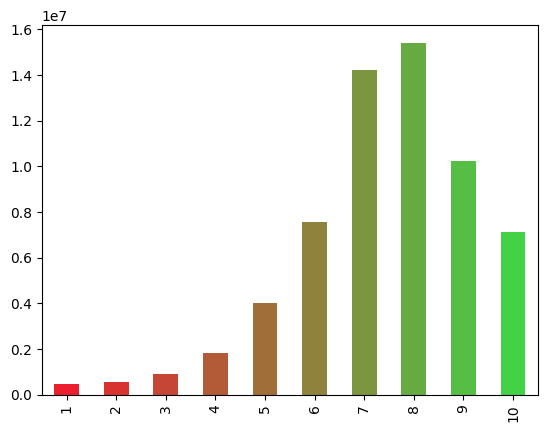

In [165]:
#repartition of ratings
df.rating.value_counts().sort_index().plot.bar(color=cols)

<Axes: >

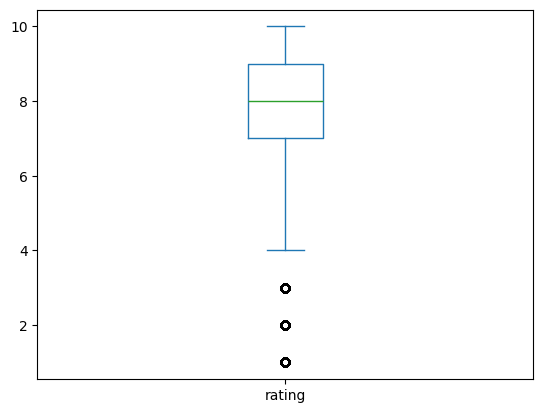

In [166]:
#repartition of ratings
df.rating.plot.box()

In [182]:
print('Number of animes:', len(df.anime_id.unique()))
print('Number of users:', len(df.user_id.unique()))
print('Number of rows:', len(df))

print('Median rating:', df.rating.median())
print('Average rating:', round(df.rating.mean(),3))

Number of animes: 17172
Number of users: 313670
Number of rows: 62397712
Median rating: 8.0
Average rating: 7.432
